In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dados = pd.read_csv("C:/Users/20221enpro0170/Downloads/areas.csv", sep=';', decimal=",")
dados

,Id,Bloco,Andar,Final,Sala,Cozinha,Banheiro,Dorm,Rachadura,Infiltr
0,1,A,1,1,27.8,7.9,5.0,11.6,ausente,ausente
1,2,A,1,2,28.3,7.3,5.4,13.1,ausente,ausente
2,3,A,1,3,27.1,7.1,5.0,14.9,ausente,ausente
3,4,A,1,4,26.5,8.4,3.9,12.4,presente,presente
4,5,A,2,1,27.7,7.6,4.7,12.1,ausente,ausente
...,...,...,...,...,...,...,...,...,...,...
147,148,B,18,4,23.5,7.4,4.3,12.2,ausente,presente
148,149,B,19,1,24.1,8.3,4.8,12.9,ausente,ausente
149,150,B,19,2,24.1,8.0,4.5,10.9,ausente,ausente
150,151,B,19,3,23.0,8.5,4.3,11.7,ausente,presente


In [31]:
tabela_Id_Bloco = pd.crosstab(dados['Id'], dados['Bloco'])
tabela_Id_Bloco

Bloco,A,B
Id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
148,0,1
149,0,1
150,0,1


In [33]:
# 1a) Número total de apartamentos
num_apartamentos = dados.shape[0]
print(f"Número total de apartamentos: {num_apartamentos}")



Número total de apartamentos: 152


In [34]:
# 1b) Número de apartamentos por bloco
print(dados["Bloco"].value_counts())

Bloco
A    76
B    76
Name: count, dtype: int64


In [36]:
# 1c) Número de apartamentos por andar
print(dados["Andar"].value_counts())

Andar
1     8
11    8
18    8
17    8
16    8
15    8
14    8
13    8
12    8
10    8
2     8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
19    8
Name: count, dtype: int64


In [38]:
# 2) Adicionar coluna com área total
dados["Area_Total"] = dados[["Sala", "Cozinha", "Banheiro", "Dorm"]].sum(axis=1)

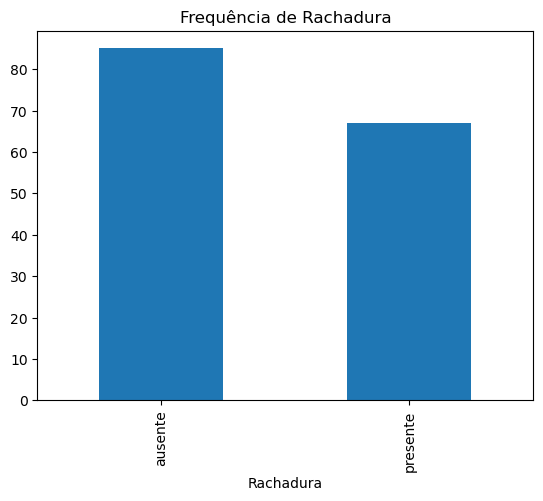

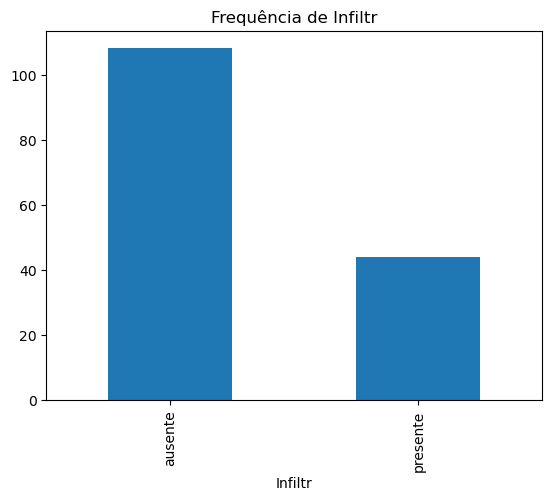

Tabulação cruzada - Rachaduras:
Rachadura  ausente  presente
Bloco                       
A               43        33
B               42        34
Tabulação cruzada - Infiltrações:
Infiltr  ausente  presente
Bloco                     
A             53        23
B             55        21
Tabulação cruzada - Rachadura por andar:
Rachadura        ausente  presente
Categoria_Andar                   
Alto                  45        35
Baixo                 40        32
Tabulação cruzada - Infiltr por andar:
Infiltr          ausente  presente
Categoria_Andar                   
Alto                  49        31
Baixo                 59        13


In [48]:
# 5) Problemas estruturais
def plot_freq_table(var):
    freq = dados[var].value_counts()
    freq.plot(kind="bar", title=f"Frequência de {var}")
    plt.show()
    
plot_freq_table("Rachadura")
plot_freq_table("Infiltr")

# Tabulação cruzada
cross_tab = pd.crosstab(dados["Bloco"], dados["Rachadura"])
print("Tabulação cruzada - Rachaduras:")
print(cross_tab)

cross_tab = pd.crosstab(dados["Bloco"], dados["Infiltr"])
print("Tabulação cruzada - Infiltrações:")
print(cross_tab)

# Criar coluna "Andar" categorizada
dados["Categoria_Andar"] = dados["Andar"].apply(lambda x: "Baixo" if x <= 9 else "Alto")

# Comparação de problemas estruturais por andar
for var in ["Rachadura", "Infiltr"]:
    cross_tab = pd.crosstab(dados["Categoria_Andar"], dados[var])
    print(f"Tabulação cruzada - {var} por andar:")
    print(cross_tab)